In [1]:
import scipy.ndimage as ndi
import numpy as np
from matplotlib import pyplot as plt
from utils import load_data, _to_float,correlate_convolve_abs
import gsm
from kernels import *

In [2]:
file_path_img_r = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_1620proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
file_path_img_m = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_810proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
# Data loading
img_r = load_data(file_path_img_r, data_range=255, normalize=True, batch=False)
img_m = load_data(file_path_img_m, data_range=255, normalize=True, batch=False)

In [3]:
img_r.dtype

dtype('uint8')

In [4]:
kernels = [gsm_kernel_x(), gsm_kernel_y(), gsm_kernel_z(), gsm_kernel_xy1(), gsm_kernel_xy2(), gsm_kernel_yz1(),
                   gsm_kernel_yz2(), gsm_kernel_xz1(), gsm_kernel_xz2()]

gradients_r = []
gradients_m = []
for kernel in kernels:
    gradients_r.append(ndi.correlate(img_r, kernel))
    gradients_m.append(ndi.correlate(img_m, kernel))

In [54]:
def mean_of_abs(input_array):
    return np.mean(np.abs(input_array))
    
sorted_gradients_r = sorted(gradients_r, key=mean_of_abs, reverse=True)
sorted_gradients_m = sorted(gradients_m, key=mean_of_abs, reverse=True)

img_r_gradient = sorted_gradients_r[0]
img_m_gradient = sorted_gradients_m[0]

In [5]:
img_r_gradient = np.zeros(gradients_r[0].shape)
img_m_gradient = np.zeros(gradients_m[0].shape)
for i in range(len(gradients_r)):
    img_r_gradient = np.maximum(img_r_gradient, gradients_r[i])
    img_m_gradient = np.maximum(img_m_gradient, gradients_m[i])

In [55]:
img_r_gradient = _to_float(img_r_gradient)
img_m_gradient = _to_float(img_m_gradient)

In [57]:
c = 200
p = 0.1
k = c / max(np.max(img_r_gradient), np.max(img_m_gradient))

In [71]:
k * c

156.86274509803923

In [58]:
r = np.abs(img_r_gradient - img_m_gradient) / max(img_r_gradient, img_m_gradient, key=mean_of_abs)
con_struc_sim = ((2 * 1 - r) + k) / (1 + (1 - r)**2 + k)
lum_sim = 1 - ((img_r - img_m) / 255)**2
weight = p * con_struc_sim
quality = (1 - weight) * con_struc_sim + weight * lum_sim

C:\Users\p42938\AppData\Local\Temp\ipykernel_16828\2323991941.py:1: RuntimeWarning: divide by zero encountered in divide
  r = np.abs(img_r_gradient - img_m_gradient) / max(img_r_gradient, img_m_gradient, key=mean_of_abs)
C:\Users\p42938\AppData\Local\Temp\ipykernel_16828\2323991941.py:1: RuntimeWarning: invalid value encountered in divide
  r = np.abs(img_r_gradient - img_m_gradient) / max(img_r_gradient, img_m_gradient, key=mean_of_abs)
C:\Users\p42938\AppData\Local\Temp\ipykernel_16828\2323991941.py:2: RuntimeWarning: invalid value encountered in divide
  con_struc_sim = ((2 * 1 - r) + k) / (1 + (1 - r)**2 + k)


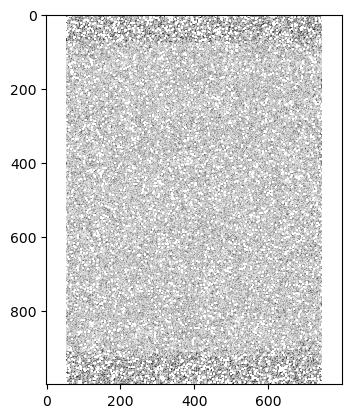

In [69]:
plt.imshow(quality[:, :, 600], cmap='gray')

In [66]:
print(np.nanmean(quality))

0.7970069310418005
